# Workshop Week 6  - Private Machine Learning - with solutions
* ## Demos for differentially private linear regression and K-means clustering
* ## Tasks: differentially private linear regression and K-means

#### Since the tasks require a Python library diffprivlib and the package depency might cause some version issues. This workshop demos and task should be done with Colab notebooks which is very similar to Jupyter notebooks we were using. Following are basic steps:
* Click[https://colab.research.google.com](https://colab.research.google.com) to access Colab notebooks.
* Upload this file into Colab
* The rest would be very similar to what you experienced in Jupyter Notebooks.



### You need to install the IBM Differential Privacy Library 
The IBM Differential Privacy Library is a general-purpose library for experimenting, investigating and developing applications in differential privacy.

* #### Installation with pip

The library is designed to run with Python 3. The library can be installed from the PyPi repository using pip (or pip3):

**pip install diffprivlib**



* #### Manual installation
Refer to [https://github.com/IBM/differential-privacy-library](https://github.com/IBM/differential-privacy-library) for more details.

In [1]:
pip install diffprivlib


     |████████████████████████████████| 87 kB 3.2 MB/s 
     |████████████████████████████████| 38.1 MB 1.1 MB/s 
  Created wheel for diffprivlib: filename=diffprivlib-0.5.1-py3-none-any.whl size=162306 sha256=3c1849651060ec4a2e3e19bee26fb01edcd870cf7b4bd2f1093ab07131683ac5
  Stored in directory: /root/.cache/pip/wheels/88/fb/35/44ce5d133fbdc88e5cbad820d700b62a4a7bb7c160408d0493
Successfully built diffprivlib
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [3]:
# Just ignore the warnings 
import warnings
warnings.filterwarnings("ignore")

# Import the necessary libraries
import math
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

### **Demo 1**. For private K-means

In [4]:
# Import a build-in dataset "Iris" in sklearn
# See https://archive.ics.uci.edu/ml/datasets/iris for more information about the dataset
from sklearn import datasets
dataset = datasets.load_iris()

# Set the features and the target
X=dataset.data
y=dataset.target

### We import the KMeans model from the diffprivlib module. The API document can be found at: [https://pypi.org/project/diffprivlib/](https://pypi.org/project/diffprivlib/)
The APIs are quite similar to the versions in sklearn, but they provide you the capability of specifying the privacy budget.


In [5]:

# Import the differential version of KMeans

from diffprivlib.models import KMeans
from sklearn.metrics import davies_bouldin_score, adjusted_rand_score
from sklearn.metrics import accuracy_score

# Create a KMeans model with specifying the privacy budget (epsilon).
kmeans = KMeans(epsilon = 1.0, n_clusters=5)
kmeans.fit(X)
labels = kmeans.labels_

print("DB score: ", davies_bouldin_score(X, labels))
print("AR score: ", adjusted_rand_score(labels, y))
print("Average inertia: ", math.sqrt(kmeans.inertia_/X.shape[0]))


DB score:  0.881626284417593
AR score:  0.5285193855227317
Average inertia:  1.8586568765242522


/usr/local/lib/python3.7/dist-packages/diffprivlib/models/k_means.py:130: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `bounds` for each dimension.
  "privacy leakage, specify `bounds` for each dimension.", PrivacyLeakWarning)


### **Task 1**. Study how eplison affects the clustering performance via visualizing the relationship between epsilon and the cluster performance indicators we used in Workshop Week 4.

You could fix value of K for the number of clusters, e.g., 5, or 10. To facilitate your task, the epsilon range and values are given in the following code. But you are free to change them to explore other values with appropriate justification.

Note that when epsilon is big enough, the model could be equivalent to the original version without noise addition. So, you can have a comparison between an original model and the differential private version.


privacy budgets (epsilons): 
 [1.00000000e-04 1.83298071e-04 3.35981829e-04 6.15848211e-04
 1.12883789e-03 2.06913808e-03 3.79269019e-03 6.95192796e-03
 1.27427499e-02 2.33572147e-02 4.28133240e-02 7.84759970e-02
 1.43844989e-01 2.63665090e-01 4.83293024e-01 8.85866790e-01
 1.62377674e+00 2.97635144e+00 5.45559478e+00 1.00000000e+01]


/usr/local/lib/python3.7/dist-packages/diffprivlib/models/k_means.py:130: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `bounds` for each dimension.
  "privacy leakage, specify `bounds` for each dimension.", PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/k_means.py:130: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided.  This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify `bounds` for each dimension.
  "privacy leakage, specify `bounds` for each dimension.", PrivacyLeakWarning)
/usr/local/lib/python3.7/dist-packages/diffprivlib/models/k_means.py:130: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided.  This will result in additio

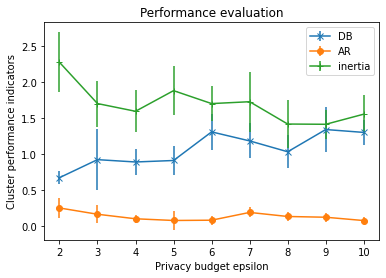

In [17]:

# We need to calculate the performance indicators for measuring the cluster quality.
db_scores = []
db_scores_std = []

ar_scores=[]
ar_scores_std=[]

inertia = []
inertia_std = []

# The privacy budget range and values are given
epsilons = np.logspace(-4, 1, 20)
print("\nprivacy budgets (epsilons): \n", epsilons)

# write your code here ...
#Considering value of K for the number of clusters is 5
for i in range(2, 11):
    # Multiple runs for stable indicators
    db_scores_tmp = []
    ar_scores_tmp = []
    inertias_tmp = []
    
    n_iteration=5
    for j in range(0, n_iteration):
        # Note: 'random_state' parameter should be set as default or None
        #kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)
        kmeans = KMeans(n_clusters=i, init='random', max_iter=300)
        kmeans.fit(X)
        labels = kmeans.labels_
        db_scores_tmp.append(davies_bouldin_score(X, labels))
        ar_scores_tmp.append(adjusted_rand_score(labels, y_pred))
        inertias_tmp.append(math.sqrt(kmeans.inertia_/X.shape[0]))
    
    db_scores.append(np.mean(db_scores_tmp))
    db_scores_std.append(np.std(db_scores_tmp))
    ar_scores.append(np.mean(ar_scores_tmp))
    ar_scores_std.append(np.std(ar_scores_tmp))
    inertia.append(np.mean(inertias_tmp))
    inertia_std.append(np.std(inertias_tmp))



# Plot the relationship between the classification accuracy and the privacy budget epsilon
plt.errorbar(range(2, 11), db_scores, yerr=db_scores_std, marker='x', label='DB')
plt.errorbar(range(2, 11), ar_scores, yerr=ar_scores_std, marker='o', label='AR')
plt.errorbar(range(2, 11), inertia, yerr=inertia_std, marker='+', label='inertia')
plt.title('Performance evaluation')
plt.xlabel('Privacy budget epsilon')
plt.ylabel('Cluster performance indicators')
plt.legend(loc='best')
plt.show()


**Question**: What's your observation from the plot? How could explain the changes of the trends?

**Answer**:

In [ ]:
In the above graph, epsilon represents the x axis and Cluster performance indicators represent the y axis. 
As the david boudlin score increases, the epsilon value also increases.
Clusters which are farther apart and less dispersed will result in a better david boudlin score.
The Adjusted rand measures the similarity between two clusterings.

A larger epsilon will produce broader clusters (encompassing more data points) and a smaller epsilon will build smaller clusters.
As epsilon value decreases , the accuracy also decreases. 
Absolute privacy occurs when epsilon value is zero. 

### **Demo 2**. For the private linear regression model

We can upload a file to Colab for the notebooks execution. The following code will prompt you to select a file. Click on “Choose Files” then select and upload the file. Wait for the file to be 100% uploaded. You should see the name of the file once Colab has uploaded it.

In [18]:
from google.colab import files
uploaded = files.upload()

Saving houses_portland(1).csv to houses_portland(1) (1).csv


Finally, type in the following code to import it into a dataframe (make sure the filename matches the name of the uploaded file).

In [20]:
import io
df_portland = pd.read_csv('houses_portland(1).csv')

Speficy the features and the target. In this demo, we just use the attribute 'area' as the future, which has been experienced in Workshop Week 3.

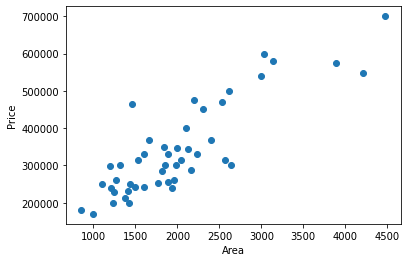

In [ ]:
X = df_portland['area'].values.reshape(-1, 1)
y = df_portland['price'].values
plt.scatter(X, y)
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

In [21]:
# Train test datasets splitting.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

**Import the private version of the linear regressoin model**

In [22]:
from diffprivlib.models import LinearRegression
dp_lr = LinearRegression(epsilon=1.0)

In [23]:
dp_lr.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/diffprivlib/models/linear_regression.py:258: PrivacyLeakWarning: Bounds parameters haven't been specified, so falling back to determining bounds from the data.
This will result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `bounds_X` and `bounds_y`.
  PrivacyLeakWarning)


LinearRegression(accountant=BudgetAccountant(spent_budget=[(1.0, 0), (1.0, 0), (1.0, 0), (1.0, 0), (1.0, 0), ...]),
                 bounds_X=(array([4.3, 2. , 1. , 0.1]),
                           array([7.9, 4.4, 6.9, 2.5])),
                 bounds_y=(array([0.]), array([2.])))

Evalute the linear regression performance with mean_squared_error and r2 score.

In [38]:
# Performance metrics
from sklearn.metrics import mean_squared_error, r2_score
# Prediction/Testing
y_pred = []
y_pred = dp_lr.predict(X_test)
print(y_pred)

# The mean squared error
print('Mean squared error: %.2f' %mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' %r2_score(y_test, y_pred))


[ 10082.81402382  15652.96978012   9065.35811365   7076.33421069
  -8534.52116957   7687.10928989  25280.16896775  -6723.04157239
  -5714.60835695  -8068.18268812   5209.42585964  11563.15396255
  22510.89111087  -7499.53801168  -7734.58600972  13405.93054055
  -1184.35770765  -3601.34720393  14465.51685348  26803.93980392
  20577.76734377  22344.52345805 -10882.83032064  -6121.28918792
  26418.10461336   7413.17026197   1488.13306492   4607.67347517
  11307.6035551   -4130.06456698]
Mean squared error: 176576609.47
Coefficient of determination: -252653335.28


In [24]:
#R2 or R-squared is a goodness-of-fit measure for linear regression models.
#R-squared measures scatter of the data points around the fitted regression line.
#It is also called the coefficient of determination. 

### **Task 2**: Study how eplison affects the regression performance via visualizing the relationship between epsilon and the regression performance indicator r2 we used in Workshop Week 3.

You can use the same epsion range and values used in Task 1.

Note that when epsilon is big enough, the model could be equivalent to the original version without noise addition. So, you can have a comparison between an original model and the differential private version.

Mean squared error: 176576609.47
Coefficient of determination: -252653335.28


/usr/local/lib/python3.7/dist-packages/diffprivlib/models/linear_regression.py:258: PrivacyLeakWarning: Bounds parameters haven't been specified, so falling back to determining bounds from the data.
This will result in additional privacy leakage. To ensure differential privacy with no additional privacy loss, specify `bounds_X` and `bounds_y`.
  PrivacyLeakWarning)


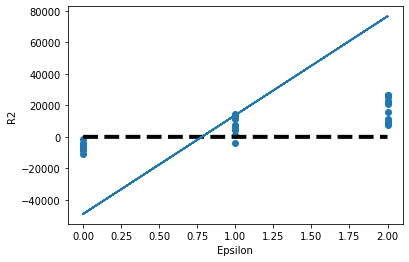

In [45]:
# Write you code here ...
from sklearn.metrics import mean_squared_error, r2_score

# The mean squared error
print('Mean squared error: %.2f' %mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' %r2_score(y_test, y_pred))


fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Epsilon')
ax.set_ylabel('R2')
#regression line
y_test, y_pred = y_test.reshape(-1,1), y_pred.reshape(-1,1)
ax.plot(y_test, LinearRegression().fit(y_test, y_pred).predict(y_test))

plt.show()

In [ ]:
#R2 or R-squared is a goodness-of-fit measure for linear regression models.
#R-squared measures scatter of the data points around the fitted regression line.
#It is also called the coefficient of determination. 

**Question**: What's your observation from the plot? How could explain the changes of the trends?


**Answer**:

In [ ]:
#As epsilon value increases, R2 value also increases. 
#Epsilon describes the random component of the linear relationship between x and y.